1\)

Least Squares Cost Function: $$g(\tilde W)=\dfrac{1}{P} \sum_{p=1}^{P}(\tilde X_{p}^{T} \tilde W - y_{p})^{2}$$
1st Derivative: $$\nabla g(\tilde W)=\dfrac{2}{P} \sum_{p=1}^{P}\tilde X_{p}(\tilde X_{p}^{T} \tilde W - y_{p})$$
2nd Derivative: $$\nabla^{2} g(\tilde W)=\dfrac{2}{P} \sum_{p=1}^{P}\tilde X_{p} \tilde X_{p}^{T}$$

2\)
$$\sigma(t) = \dfrac{1}{1+e^{-t}}$$
$$\dfrac{d\sigma(t)}{dt} = \dfrac{-1}{(1+e^{-t})^2}(-e^{-t})$$
$$\dfrac{d\sigma(t)}{dt} = \dfrac{-1}{(1+e^{-t})} \dfrac{e^{-t}}{(1+e^{-t})}$$
$$\dfrac{d\sigma(t)}{dt} = \dfrac{1}{(1+e^{-t})} \dfrac{1}{(1+e^{t})}$$
$$1-\sigma(t) = 1-\dfrac{1}{1+e^{-t}} = \dfrac{(1+e^{-t})-1}{1+e^{-t}} = \dfrac{1}{1+e^{t}}$$
$$\dfrac{d\sigma(t)}{dt} = \sigma(t) (1-\sigma(t))$$

3\)

4\)

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
X = iris.data[:,0:4]
Y = iris.target

import numpy as np
ones = np.ones(X.shape[0], dtype=float)
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)
X_std = np.column_stack((ones, X_std))

In [2]:
def activation(Z):
    act = 1./(1.+np.exp(-np.clip(Z,-250,250)))
    return( act )

In [3]:
from sklearn.preprocessing import OneHotEncoder

def onehot(Y):
    onehot_encoder = OneHotEncoder(sparse_output=False)
    integer_encoded = Y.reshape(len(Y), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return(onehot_encoded)

Y = onehot(Y)

In [4]:
def argmax(Z):
    maxz = max(Z)
    for j in range(len(Z)):
        Z[j] = 1.0 if Z[j]>=maxz else 0
    return(Z)

[[-0.18931029  0.77997987 -0.64872674 -0.15769738]
 [-0.41341337 -0.1442158  -0.02808722  0.14159618]
 [-0.35029836 -0.35546808  0.47351624  0.77536817]]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0. 0.]   [1. 0. 0.]
[1. 0.

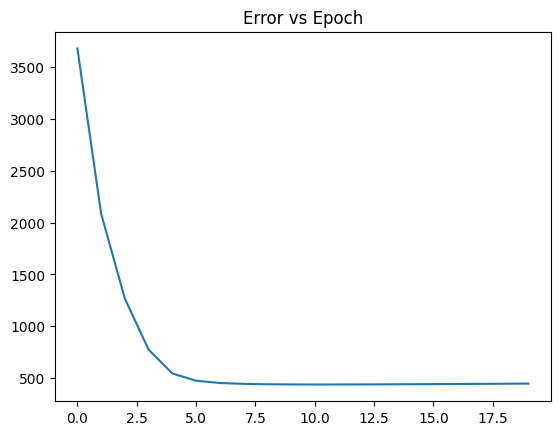

In [37]:
import matplotlib.pyplot as plt

def crossentropy_loss(Y, Y_pred):
    e = 1e-15 # For preventing log(0) error
    loss = -Y*np.log(Y_pred)-(1+Y)*np.log(1-Y_pred)
    return loss

def perceptron_sgd(X, Y, a, epochs=100):
    errors = []
    total_error = 0
    error = [0,0,0]

    W = np.random.rand(Y.shape[1], X.shape[1]) #3x5

    for t in range(epochs):
        total_error = 0
        for i,x in enumerate(X):
            for j in range(Y.shape[1]):
                Y_pred = np.dot(x.T, W[j])
                Y_pred = activation(Y_pred)
                error[j] = crossentropy_loss(Y[i,j], Y_pred)
                dw = -x*(Y[i,j]-Y_pred)
                W[j] -= a*dw
                total_error += error[j]
        errors.append(total_error)
    return W, errors

W, errors = perceptron_sgd(X, Y, 5e-4, epochs=20)
print(W)
Y_pred = np.dot(X, W.T)
for i, y_pred in enumerate(Y_pred):
    Y_pred[i] = argmax(y_pred)
    print(Y_pred[i],' ', Y[i])

plt.title("Error vs Epoch")
plt.plot(range(len(errors)), errors)
plt.show()

